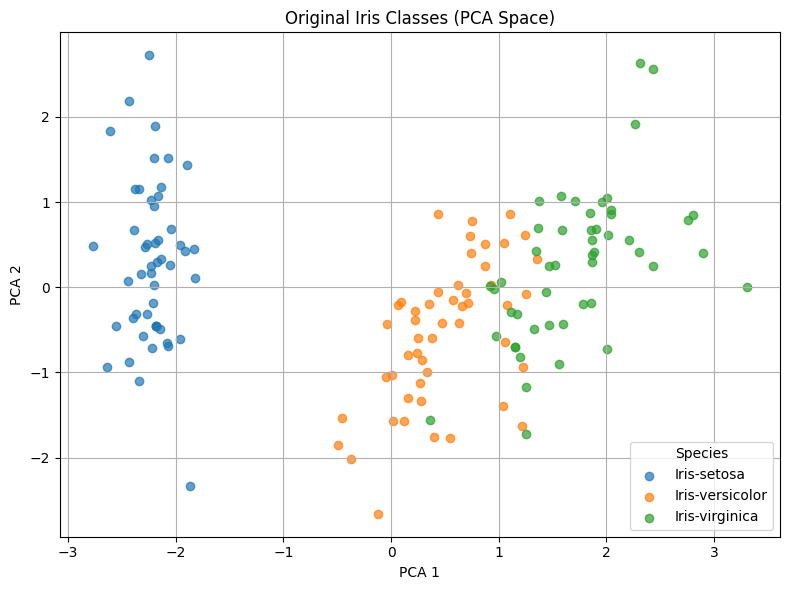

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv("data/Iris.csv", index_col='Id')
features = data.drop(columns=['Species'])
scaled = StandardScaler().fit_transform(features)

# PCA transformation for 2D projection
pca_features = PCA(n_components=2).fit_transform(scaled)
pca_df_base = pd.DataFrame(pca_features, columns=["PCA1", "PCA2"], index=data.index)
pca_df_base["Species"] = data["Species"]

# --- 0. Ground Truth Visualization (static Matplotlib) ---
plt.figure(figsize=(8, 6))
for species in pca_df_base["Species"].unique():
    mask = pca_df_base["Species"] == species
    plt.scatter(
        pca_df_base.loc[mask, "PCA1"],
        pca_df_base.loc[mask, "PCA2"],
        label=species,
        alpha=0.7
    )
plt.title("Original Iris Classes (PCA Space)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Species")
plt.grid(True)
plt.tight_layout()
plt.show()

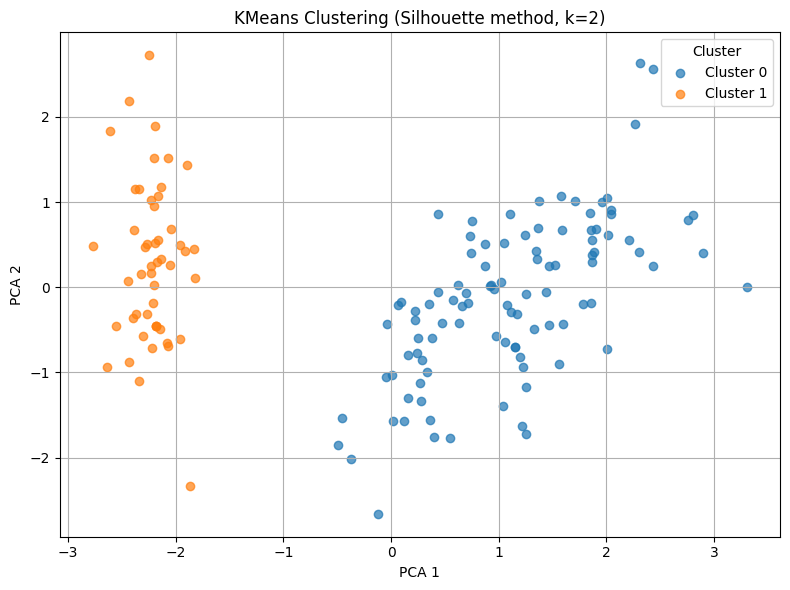

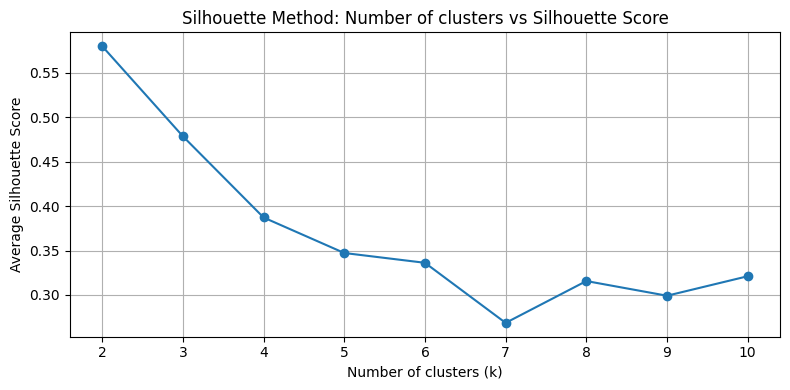

In [164]:
# --- 1. Silhouette Method (Automatic selection of k) ---
pca_df_sil = pca_df_base.copy()
silhouette_scores = []
k_range = range(2, 11)

# Calculate Silhouette Score for different values of k
for k in k_range:
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(scaled)
    silhouette_scores.append(silhouette_score(scaled, labels))

# Choose the best k based on the highest Silhouette Score
best_k_sil = k_range[np.argmax(silhouette_scores)]
labels_sil = KMeans(n_clusters=best_k_sil, random_state=42).fit_predict(scaled)
pca_df_sil["Silhouette"] = labels_sil.astype(str)

# --- Static Matplotlib visualization of clusters ---
plt.figure(figsize=(8, 6))
for cluster_label in sorted(pca_df_sil["Silhouette"].unique()):
    mask = pca_df_sil["Silhouette"] == cluster_label
    plt.scatter(
        pca_df_sil.loc[mask, "PCA1"],
        pca_df_sil.loc[mask, "PCA2"],
        label=f"Cluster {cluster_label}",
        alpha=0.7
    )
plt.title(f"KMeans Clustering (Silhouette method, k={best_k_sil})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Static Matplotlib plot: Number of clusters vs Silhouette Score ---
plt.figure(figsize=(8, 4))
plt.plot(list(k_range), silhouette_scores, marker='o')
plt.title("Silhouette Method: Number of clusters vs Silhouette Score")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.xticks(list(k_range))
plt.grid(True)
plt.tight_layout()
plt.show()

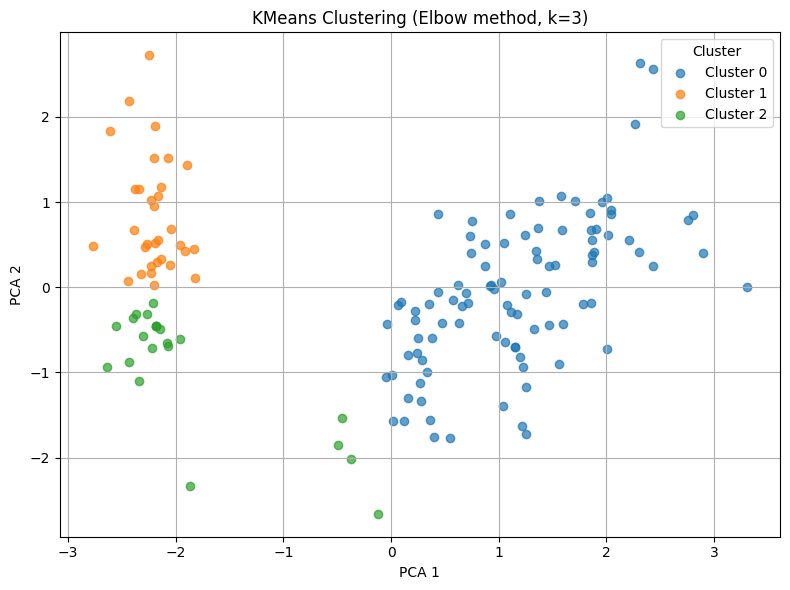

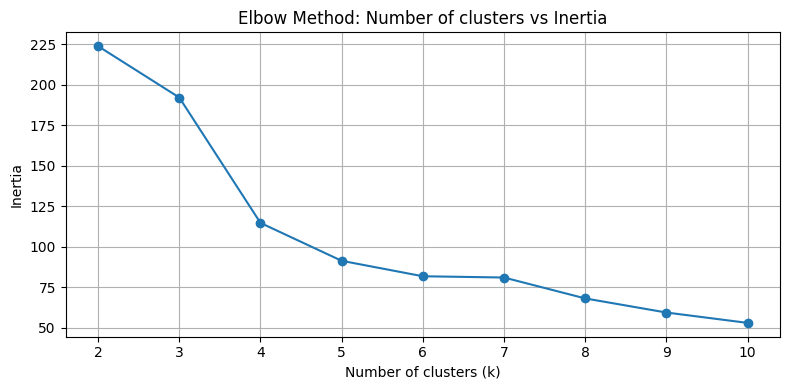

In [165]:
# --- 2. Elbow Method (Automatic estimation of optimal k based on inertia curve) ---
pca_df_elbow = pca_df_base.copy()
inertias = []

# Compute inertia for different values of k (within defined range)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42).fit(scaled)
    inertias.append(km.inertia_)

# Choose the best k (elbow point) - here manually set or could be calculated by curvature detection
best_k_elbow = 3
labels_elbow = KMeans(n_clusters=best_k_elbow, random_state=42).fit_predict(scaled)
pca_df_elbow["Elbow"] = labels_elbow.astype(str)

# Static Matplotlib visualization of clusters
plt.figure(figsize=(8, 6))
for cluster_label in sorted(pca_df_elbow["Elbow"].unique()):
    mask = pca_df_elbow["Elbow"] == cluster_label
    plt.scatter(
        pca_df_elbow.loc[mask, "PCA1"],
        pca_df_elbow.loc[mask, "PCA2"],
        label=f"Cluster {cluster_label}",
        alpha=0.7
    )
plt.title(f"KMeans Clustering (Elbow method, k={best_k_elbow})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# Static Matplotlib plot: Number of clusters vs Inertia
plt.figure(figsize=(8, 4))
plt.plot(list(k_range), inertias, marker='o')
plt.title("Elbow Method: Number of clusters vs Inertia")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(list(k_range))
plt.grid(True)
plt.tight_layout()
plt.show()

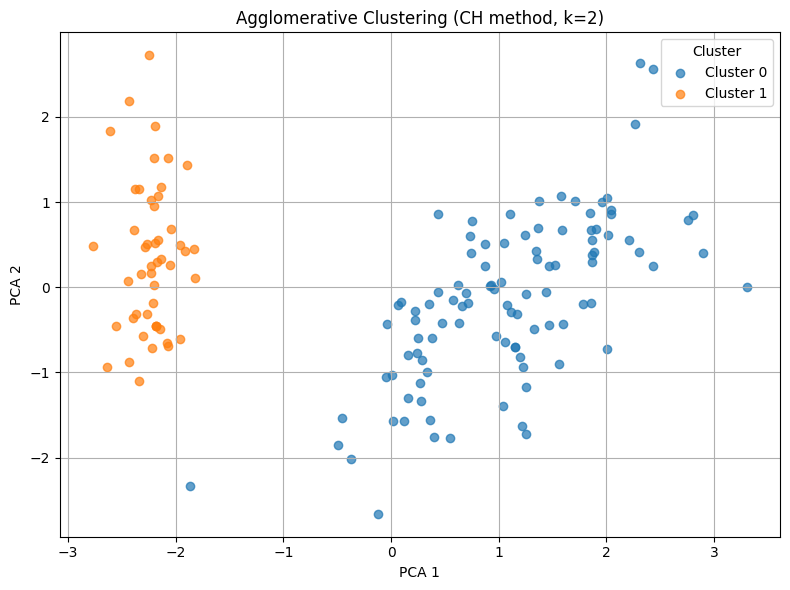

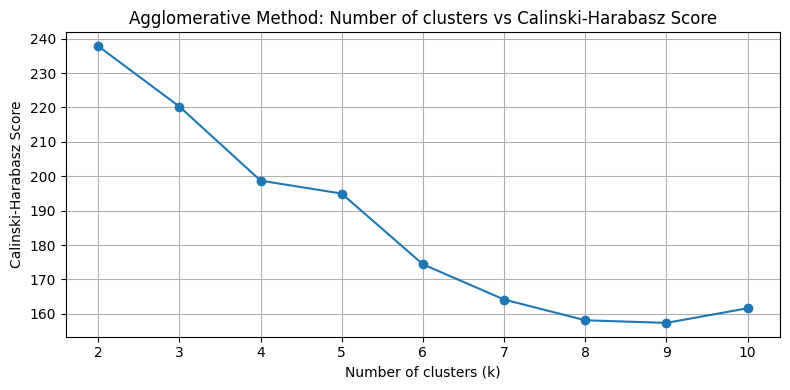

In [166]:
# --- 3. Agglomerative Clustering (using Calinski-Harabasz Index to find optimal k) ---
pca_df_agg = pca_df_base.copy()
ch_scores = []
k_range = range(2, 11)

# Evaluate clustering quality for different values of k using CH score
for k in k_range:
    labels = AgglomerativeClustering(n_clusters=k).fit_predict(scaled)
    ch_scores.append(calinski_harabasz_score(scaled, labels))

# Select the number of clusters with the highest Calinski-Harabasz Score
best_k_agg = k_range[np.argmax(ch_scores)]
labels_agg = AgglomerativeClustering(n_clusters=best_k_agg).fit_predict(scaled)
pca_df_agg["Agglomerative"] = labels_agg.astype(str)

# Static Matplotlib scatter of clusters
plt.figure(figsize=(8, 6))
for cluster_label in sorted(pca_df_agg["Agglomerative"].unique()):
    mask = pca_df_agg["Agglomerative"] == cluster_label
    plt.scatter(
        pca_df_agg.loc[mask, "PCA1"],
        pca_df_agg.loc[mask, "PCA2"],
        label=f"Cluster {cluster_label}",
        alpha=0.7
    )
plt.title(f"Agglomerative Clustering (CH method, k={best_k_agg})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# Static Matplotlib plot: Number of clusters vs Calinski-Harabasz Score
plt.figure(figsize=(8, 4))
plt.plot(list(k_range), ch_scores, marker='o')
plt.title("Agglomerative Method: Number of clusters vs Calinski-Harabasz Score")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski-Harabasz Score")
plt.xticks(list(k_range))
plt.grid(True)
plt.tight_layout()
plt.show()

In [168]:
import pandas as pd

# Data for comparing clustering methods
comparison_data = {
    "Method": [
        "Silhouette (KMeans)", 
        "Elbow (KMeans)", 
        "Agglomerative (CH-Score)"
    ],
    "Automatic Metric": [
        "Silhouette Score (max)", 
        "Inertia (elbow point)", 
        "Calinski-Harabasz Score (max)"
    ],
    "Method Description": [
        "Maximizes separation between clusters and similarity within clusters",
        "Looks for the point where inertia improvement slows down significantly",
        "Maximizes inter-cluster dispersion relative to intra-cluster compactness"
    ],
    "Typical Behavior": [
        "Tends to find fewer clusters if they are well-separated",
        "Balances between model simplicity and clustering quality",
        "Often detects more subclusters within the data"
    ]
}

# Create a DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display the table as a standard Jupyter o utput
comparison_df

,Method,Automatic Metric,Method Description,Typical Behavior
0,Silhouette (KMeans),Silhouette Score (max),Maximizes separation between clusters and simi...,Tends to find fewer clusters if they are well-...
1,Elbow (KMeans),Inertia (elbow point),Looks for the point where inertia improvement ...,Balances between model simplicity and clusteri...
2,Agglomerative (CH-Score),Calinski-Harabasz Score (max),Maximizes inter-cluster dispersion relative to...,Often detects more subclusters within the data
